# Automated Hate Speech Detection in Reddit Platform

# **Business Problem :**

In today's digital era, social media platforms are vital spaces for self-expression. However, this openness often leads to the spread of abuse, offense, and hate speech. Hate speech detection aims to quickly identify and address communication that incites violence or promotes hatred based on sensitive attributes like ethnicity, gender, sexual orientation, religion, and age.

# **Solution Description**

To develop a hate speech detection system capable of accurately identifying and classifying hate speech in real-time, ensuring a safer and more welcoming environment for Reddit users.

To tackle hate speech on Reddit, a comprehensive detection system was developed using machine learning (ML) and deep learning (DL) techniques:

**Scope of the Project**:
- Focused on textual data from Reddit comments and posts.

- Targeted specific Subreddits and post sections for detailed analysis.

- Limited analysis to English language content to ensure focused and effective detection.

- Excluded multilingual data to maintain clarity and precision in hate speech detection.

**Steps to implementation :**

- **Data Collection:** Gathered extensive data from Reddit to create a comprehensive hate speech dataset.

- **Data Preprocessing**: Cleaned and preprocessed the data to remove noise and ensure consistency.

- **Tokenization**: Applied various tokenization techniques to break down text into manageable pieces.

- **Encoding**: Used encoding methods to transform text into numerical data suitable for model training.

- **Machine Learning**: Implemented and evaluated several models: Random Forest, Logistic Regression, Naive Bayes Classifier and SVM.

- **Deep Learning**: Developed and tested deep learning models including Simple Neural Network (NN), Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM)

# **Dataset Description :**

**Source :**

The dataset originates from "A Benchmark Dataset for Learning to Intervene in Online Hate Speech".

Link: https://github.com/jing-qian/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech

**Dataset Overview:**
- Originally comprised approximately 5,000 posts and comments extracted from Reddit.

- Each row includes comments associated with specific posts, accompanied by an index indicating the presence of hate speech.

- Provides human-written explanations detailing why comments are categorized as hate speech.

**Dataset Restructuring:**
- Restructured to transform each post into individual rows for comments.

- Dataset size expanded from 5k to 22k entries.

- Comments are labeled:
1: Contains hate speech
0: Does not contain hate speech

# **Data Visualization**

**Dataset Size:**

Total Size : 22,841

**Dataset Distributions:**

- Non-Hate Speech: 17,545

- Hate Speech: 5,296

**After Splitting**:

Training Data, Shape: (17,760 samples, 300 features)
Class Distribution: {0: 13506 ,1: 4254}
Testing Data, Shape: (4,440 samples, 300 features)
Class Distribution: {0: 3408 ,1: 1032}

**Data Distribution**

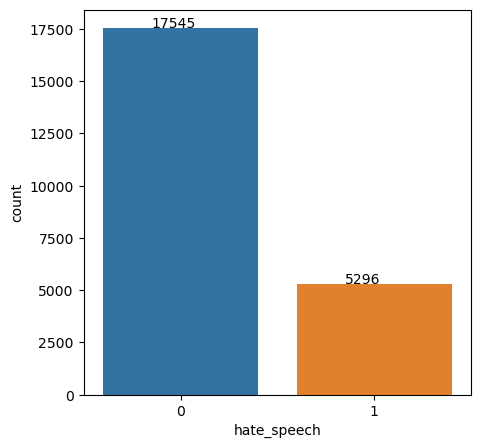

**Train Dataset :**

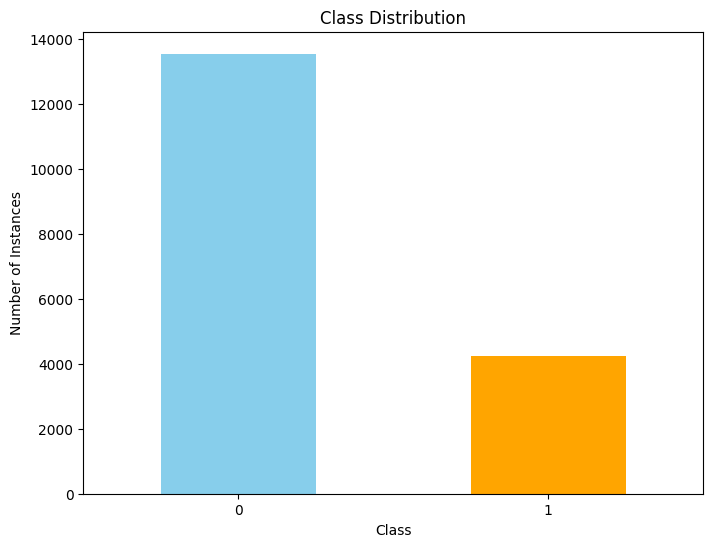

**Test Dataset :**

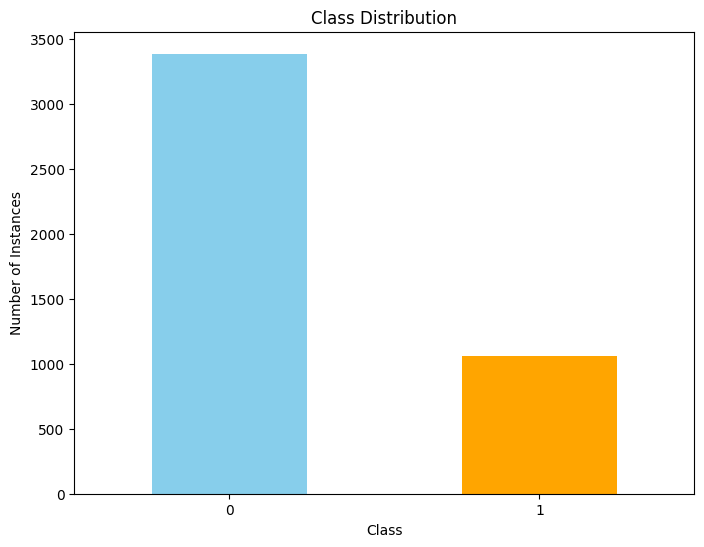

**After Applying SMOTE on Train Dataset :**

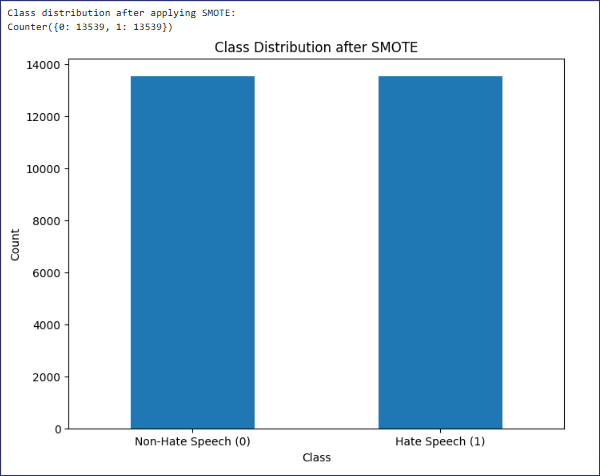

**WordCloud:**

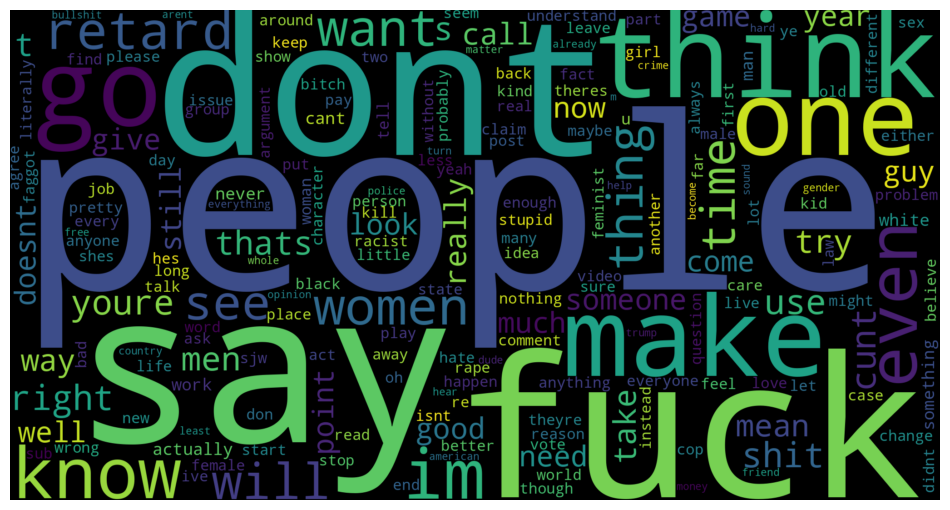

# **Final Model : Bert (Bidirectional Encoder Representations from Transformers)**

**Classification Report :**

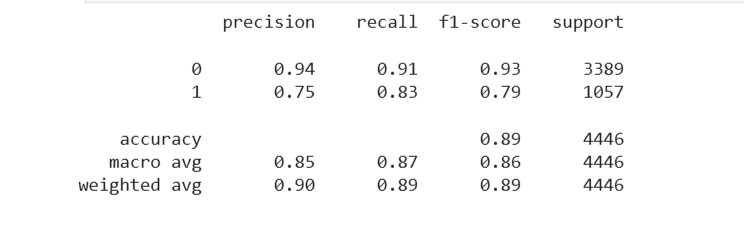

**OverAll Score :**

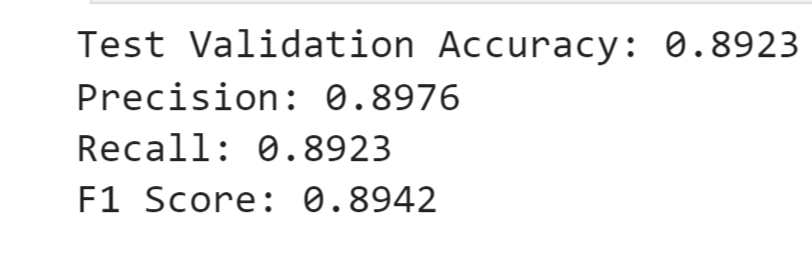

**Confusion Matrix**

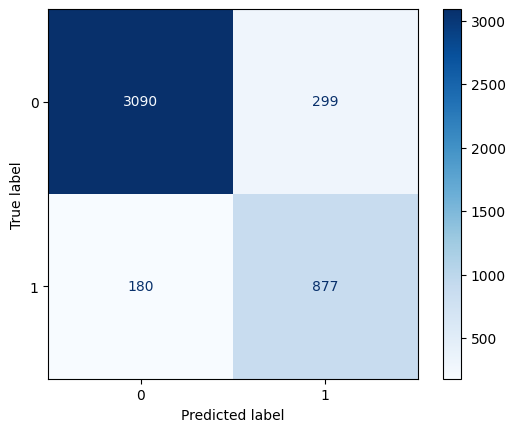

**Sample of Model Prediction**

In [4]:
import re
import json
import string
import emoji
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Load chat words and number meanings if needed
with open('/content/drive/MyDrive/Colab Notebooks/chat_words (1).json', 'r') as f:
    chat_words = json.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/number_meanings.json', 'r') as f:
    number_meanings = json.load(f)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    # Lowercase text
    text = text.lower()

    # Clean spaces
    text = ' '.join(text.split())

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Replace chat words
    new_text = []
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)
    text = " ".join(new_text)

    # Convert emojis to text
    text = emoji.demojize(text, delimiters=("", ""))

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]

    # Join tokens back into sentence
    text = ' '.join(tokens)

    return text

In [29]:
# Example input text
input_text = "!!!!&#;@selfie_queen_bri: http://t.co/pmxc86154321 cause I'm tired of you big bitches coming for us skinny girls !!&#;"
# Apply preprocessing function
preprocessed_text = preprocess_text(input_text)
print("original text:",input_text)
print("preprocessed text:",preprocessed_text)

original text: !!!!&#;@selfie_queen_bri: http://t.co/pmxc86154321 cause I'm tired of you big bitches coming for us skinny girls!!&#;
preprocessed text: selfiequeenbri cause im tire of you big bitch come for us skinny girls


In [30]:

import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Assuming 'bert_classifier.pth' is saved in the current directory

# Load the pre-trained BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)  # Assuming binary classification
# Load the state_dict
state_dict = torch.load('/content/drive/MyDrive/bert_classifier.pth',map_location=torch.device('cpu'))

# Transfer the weights
if "fc.weight" in state_dict:
    state_dict["classifier.weight"] = state_dict.pop("fc.weight")
if "fc.bias" in state_dict:
    state_dict["classifier.bias"] = state_dict.pop("fc.bias")

# Load the modified state_dict into the model
model.load_state_dict(state_dict)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to preprocess text and apply BERT model
def predict(text, model, tokenizer):
    # Tokenize input text
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

    # Forward pass through BERT model
    outputs = model(**inputs)

    # Get prediction (assuming binary classification)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)

    # Determine if it contains hate speech
    label = torch.argmax(probabilities, dim=1).item()
    if label == 1:
        return "Contains hate speech"
    else:
        return "Does not contain hate speech"

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Classification: Does not contain hate speech


In [38]:
test_text = "!!!!&#;@selfie_queen_bri: http://t.co/pmxc86154321 cause I'm tired of you big faggot bitches coming for us skinny girls !!&#;"
sentiment = predict(test_text, model, tokenizer)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

!!!!&#;@selfie_queen_bri: http://t.co/pmxc86154321 cause I'm tired of you big faggot bitches coming for us skinny girls !!&#;
Predicted sentiment: Contains hate speech


In [21]:
test_text = " I hate Disneyland. It's fucking waste of money"
sentiment = predict(test_text, model, tokenizer)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

 I hate Disneyland. It's fucking waste of money
Predicted sentiment: Does not contain hate speech


In [22]:
test_text = " we dont trust these niggas all these bitches "
sentiment = predict(test_text, model, tokenizer)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

 we dont trust these niggas all these bitches 
Predicted sentiment: Contains hate speech


In [23]:
test_text= "The new restaurant in town has amazing food and great service."
sentiment = predict(test_text, model, tokenizer)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

The new restaurant in town has amazing food and great service.
Predicted sentiment: Does not contain hate speech


In [32]:
test_text= "Don't trust any of these rich bitches"
sentiment = predict(test_text, model, tokenizer)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

Don't trust any of these rich bitches
Predicted sentiment: Contains hate speech


In [35]:
test_text= "In this restuarant food always tastes like shit"
sentiment = predict(test_text, model, tokenizer)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

In this restuarant food always tastes like shit
Predicted sentiment: Does not contain hate speech
